# Project: SAT & ACT Analysis

Completed by: Audrey Chan

## Problem Statement

SAT and ACT are two standardized college admission tests in the United States, required for college admissions decision and awarding merit-based scholarships to high school students applying to colleges. This is a big milestone for students (and their parents!) but interestingly, there's a huge difference in ACT and SAT participation rates and scores across different states. In this project, we will take a deeper look into these differences and propose recommendations to the College Board.

## Executive Summary

Throughout this Jupyter notebook, it will walk through code and through process steps taken to import and clean data, data analysis, data visualizations, statistics, conclusions, and recommendations. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import stats
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# read in SAT and ACT data
sat = pd.read_csv('../data/sat_2017.csv')
act = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# first 10 rows of sat df
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# first 10 rows of act df
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:** The data consists of partipation rates (in percentages) and sat scores (evidence-based reading/writing, math, total) and act scores (english, math, reading, science, total) by 51 states in the US.

In [5]:
# check for blank fields in sat df
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
# check for blank fields in act df
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


#### 4a. Does the data look complete? 

**Answer:** At this point, both data sets looks complete. All US states are present and there are no blank cells. However, there were errors and issues with the data found captured below in 4b. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**

For SAT, the possible score ranges are the following:
- Total score: 400–1600
- Evidence-Based Reading and Writing Section: 200–800
- Math Section: 200–800

For ACT, the possible score ranges are the following:
- English, Math, Reading, Science, and Composite(Total): 1-36
    
Issues:
- Maryland SAT math score has a typo (52 suppose to be 524)
- Maryland ACT science score has a typo (2.3 suppose to be 23.2)
- ACT score includes an extra row (consisting of the National averages of each column)
- Wyoming ACT composite score has a typo ('20.2x' suppose to be 20.2)

*Code below was used to check if values fell outside of possible score ranges, to catch any data entry errors*

In [7]:
# this section of code will output any state and scores that fall outside possible test score ranges

section = 'Evidence-Based Reading and Writing'
display(sat[(sat[section]<200) | (sat[section]>800)])

section = 'Math'
display(sat[(sat[section]<200) | (sat[section]>800)])

section = 'Total'
sat[(sat[section]<400) | (sat[section]>1600)]

section = 'English'
act[(act[section]<1) | (act[section]>36)]

section = 'Math'
act[(act[section]<1) | (act[section]>36)]

section = 'Reading'
act[(act[section]<1) | (act[section]>36)]

section = 'Science'
act[(act[section]<1) | (act[section]>36)]

# section = 'Composite'
# act[(act[section]<1) | (act[section]>36)]
# returns a TypeError: '<' not supported between instances of 'str' and 'int'

,State,Participation,Evidence-Based Reading and Writing,Math,Total


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


,State,Participation,English,Math,Reading,Science,Composite


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
# fix Maryland SAT math score
maryland_math_index = sat['State'] == 'Maryland' # get row index for Maryland
sat.loc[maryland_math_index, 'Math'] = 524
sat[maryland_math_index] # output row to check if change was made

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [9]:
# Fixing Maryland ACT science score
maryland_science_index = act['State'] == 'Maryland'
act.loc[maryland_science_index, 'Science'] = 23.2
act[maryland_science_index]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [10]:
# fix Wyoming ACT composite score typo
wyoming_composite_index = act['State'] == 'Wyoming'
act.loc[wyoming_composite_index, 'Composite'] = '20.2'
act[wyoming_composite_index]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [11]:
# remove ACT National average data row (first row of df)
act = act.drop(0)
act = act.reset_index(drop = True)
act.head() # check if change was made

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
4,California,31%,22.5,22.7,23.1,22.2,22.8


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [13]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:** Participation data and ACT composite score are currently an object(str) but should be int or float. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
# method to convert participation column (percent value with % sign) from str to integer
def participation_to_int (data):
    return data.str.replace('%', '').astype(int) # used str.replace instead of map or apply

In [15]:
# convert SAT participation from str to float
sat.Participation = participation_to_int(sat.Participation)
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [16]:
# convert SAT participation from str to float
act.Participation = participation_to_int(act.Participation)
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,31,22.5,22.7,23.1,22.2,22.8


- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
# fixed Wyoming typo above in 4c ('20.2x' changed to 20.2)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
# convert ACT composite scores from str to float
act['Composite'] = act.Composite.astype(float)

- Display the data types again to confirm they are correct.

In [19]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [20]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null int64
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
sat_renames = {'State':'state',
               'Participation':'sat_2017_participation',
               'Evidence-Based Reading and Writing':'sat_2017_ebrw',
               'Math':'sat_2017_math',
               'Total':'sat_2017_total'} # dictionary with old and new column names' pair
act_renames = {'State':'state',
               'Participation':'act_2017_participation',
               'English':'act_2017_english',
               'Math':'act_2017_math',
               'Reading':'act_2017_reading',
               'Science':'act_2017_science',
               'Composite':'act_2017_composite'}

sat = sat.rename(columns = sat_renames)
act = act.rename(columns =  act_renames)

In [22]:
sat.head()

,state,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [23]:
act.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,31,22.5,22.7,23.1,22.2,22.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


**Below is a data dictionary for the SAT and ACT 2017 datasets:**

| Feature                     | Type   | Dataset  | Description |
|:----------------------------|:-------|:--------:|:------------|
| **state**                   |*string*| SAT/ACT  | Name of USA state (i.e. Iowa) |
| **sat_2017_participation**  |*int*   | 2017 SAT | Percentage of people that participated in a test (i.e. 100% of Arkansas participated in the 2017 SAT test) |
| **sat_2017_ebrw**           |*int*   | 2017 SAT | Average score for the subject area of 'evidence based reading and writing' (potential score from 200-800) |
| **sat_2017_math**	          |*int*   | 2017 SAT | Average score for the subject area of 'math' (potential score from 200-800)  |
| **sat_2017_total**	      |*int*   | 2017 SAT | Average total score (potential score from 400-1600), adding scores from each subject areas together  |
| **act_2017_participation**  |*int*   | 2017 ACT | Percentage of a state that participated in a test |
| **act_2017_english**        |*float* | 2017 ACT | Average score for the subject area of 'english' (potential score from 1-36) |
| **act_2017_math**           |*float* | 2017 ACT | Average score for the subject area of 'math' (potential score from 1-36) |
| **act_2017_reading**        |*float* | 2017 ACT | Average score for the subject area of 'reading' (potential score from 1-36) |
| **act_2017_science**        |*float* | 2017 ACT | Average score for the subject area of 'science' (potential score from 1-36) |
| **act_2017_composite**      |*float* | 2017 ACT | Average total score (potential score from 1-36), averaging scores from each subject areas together  |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
# removed unecessary row above in 4c

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
combined_2017 = sat.merge(act, on = 'state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

**Here are the steps taken for manually collecting the 2018 SAT and ACT data:**
- **SAT** 2018 data was collected from this [website](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent), as someone summarized this data from the initial source (The College Board) for us!
- The data was copied to excel and exported to csv (2018_sat.csv)
- Potential error entry errors were caught, but using excel to calculate the sum of the reading/writing and math scores and comparing to the SAT total score
- Changed the following errors, changing to the correct value from the initial source:
> - changed IOWA math from 632 to 631
> - changed MONTANA total from 1229 to 1198
> - changed WASHINGTON total from 1082 to 1081
> - changed WYOMING math from 635 to 625
- **ACT** 2018 data was manually collected and csv was created (2018_act.csv)

In [27]:
# read in SAT and ACT data
sat = pd.read_csv('../data/sat_2018.csv')
act = pd.read_csv('../data/act_2018.csv')

In [28]:
# merge, removing extra two states in SAT (virgin islands and puerto rico)
combined_2018 = sat.merge(act,
                          on = 'state',
                          how = 'right')

# remove columns used to check for entry errors
combined_2018 = combined_2018.drop(['total_calculated', 'diff_between_totals'],
                                   axis = 1) 

combined_2018.head()

,state,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,6%,595,571,1166,100,19.1
1,Alaska,43%,562,544,1106,33,20.8
2,Arizona,29%,577,572,1149,66,19.2
3,Arkansas,5%,592,576,1169,100,19.4
4,California,60%,540,536,1076,27,22.7


In [29]:
combined_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
state                     51 non-null object
sat_2018_participation    51 non-null object
sat_2018_ebrw             51 non-null int64
sat_2018_math             51 non-null int64
sat_2018_total            51 non-null int64
act_2018_participation    51 non-null int64
act_2018_composite        51 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.2+ KB


In [30]:
# convert sat participation to int
combined_2018.sat_2018_participation = participation_to_int(combined_2018.sat_2018_participation)

In [31]:
combined_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
state                     51 non-null object
sat_2018_participation    51 non-null int64
sat_2018_ebrw             51 non-null int64
sat_2018_math             51 non-null int64
sat_2018_total            51 non-null int64
act_2018_participation    51 non-null int64
act_2018_composite        51 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.2+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
final = combined_2017.merge(combined_2018, on = 'state')

In [33]:
final.head()

,state,sat_2017_participation,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_ebrw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7


In [34]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
state                     51 non-null object
sat_2017_participation    51 non-null int64
sat_2017_ebrw             51 non-null int64
sat_2017_math             51 non-null int64
sat_2017_total            51 non-null int64
act_2017_participation    51 non-null int64
act_2017_english          51 non-null float64
act_2017_math             51 non-null float64
act_2017_reading          51 non-null float64
act_2017_science          51 non-null float64
act_2017_composite        51 non-null float64
sat_2018_participation    51 non-null int64
sat_2018_ebrw             51 non-null int64
sat_2018_math             51 non-null int64
sat_2018_total            51 non-null int64
act_2018_participation    51 non-null int64
act_2018_composite        51 non-null float64
dtypes: float64(6), int64(10), object(1)
memory usage: 7.2+ KB


In [35]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [37]:
# function to calculate standard deviation, takes in a column content (as a Series)
def standard_dev (content):
    sum = 0
    mean = content.mean()
    for value in content:
        sum += ((value - mean) ** 2)
    return ((sum / len(content)) ** 0.5) # returns back sigma

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [38]:
final_only_num = final.drop(['state'], axis = 1) # creating a df with only the numeric columns

sd = {label:standard_dev(content) for label, content in final_only_num.iteritems()}
sd

{'sat_2017_participation': 34.92907076664508,
 'sat_2017_ebrw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 37.63965409204986,
 'sat_2018_ebrw': 44.87118561762388,
 'sat_2018_math': 48.40589946919447,
 'sat_2018_total': 92.94372462792965,
 'act_2018_participation': 33.745194881997506,
 'act_2018_composite': 2.0968220768561987}

In [39]:
np.std(final) # using numpy's std method

sat_2017_participation    34.929071
sat_2017_ebrw             45.216970
sat_2017_math             46.657134
sat_2017_total            91.583511
act_2017_participation    31.824176
act_2017_english           2.330488
act_2017_math              1.962462
act_2017_reading           2.046903
act_2017_science           1.722216
act_2017_composite         2.000786
sat_2018_participation    37.639654
sat_2018_ebrw             44.871186
sat_2018_math             48.405899
sat_2018_total            92.943725
act_2018_participation    33.745195
act_2018_composite         2.096822
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:** The manually calculated standard deviation matches up with the output of numpy's std method, but slightly off from the output of pandas describe(). This is because Pandas std method uses the standard deviation formula based on a sample std ± √(∑(xi - x(bar))^2) /n-1) , whereas numpy uses the one based on a population ± √(∑((xi - µ )^2) /n). We used the latter equation for our calculated std, which is why values matches with numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [40]:
# find all states with highest and lowest SAT participation rate (for 2017 and 2018)
display(
    final[final['sat_2017_participation'].values == 
          final['sat_2017_participation'].values.max()
         ].loc[:,['state', 'sat_2017_participation']]
)
display(
    final[final['sat_2017_participation'].values == 
        final['sat_2017_participation'].values.min()
         ].loc[:,['state', 'sat_2017_participation']]
)
display(
    final[final['sat_2018_participation'].values ==
        final['sat_2018_participation'].values.max()
         ].loc[:,['state', 'sat_2018_participation']]
)
display(
    final[final['sat_2018_participation'].values ==
          final['sat_2018_participation'].values.min()
         ].loc[:,['state', 'sat_2018_participation']]
)

,state,sat_2017_participation
6,Connecticut,100
7,Delaware,100
8,District of Columbia,100
22,Michigan,100


,state,sat_2017_participation
15,Iowa,2
24,Mississippi,2
34,North Dakota,2


,state,sat_2018_participation
5,Colorado,100
6,Connecticut,100
7,Delaware,100
12,Idaho,100
22,Michigan,100


,state,sat_2018_participation
34,North Dakota,2


**Finding:**
- Connecticut, Delaware, District of Columbia, Michigan, Colorado, and Idaho have the highest SAT participation rates (with 100%). 
- Iowa, Mississippi, and North Dakota have the lowest (with 2%).

In [41]:
# find all states with highest and lowest ACT participation rate (for 2017 and 2018)
display(
    final[final['act_2017_participation'].values == 
          final['act_2017_participation'].values.max()
         ].loc[:,['state', 'act_2017_participation']])
display(
    final[final['act_2017_participation'].values == 
          final['act_2017_participation'].values.min()
         ].loc[:,['state', 'act_2017_participation']])
display(
    final[final['act_2018_participation'].values == 
          final['act_2018_participation'].values.max()
         ].loc[:,['state', 'act_2018_participation']])
display(
    final[final['act_2018_participation'].values == 
          final['act_2018_participation'].values.min()
         ].loc[:,['state', 'act_2018_participation']])

,state,act_2017_participation
0,Alabama,100
3,Arkansas,100
5,Colorado,100
17,Kentucky,100
18,Louisiana,100
23,Minnesota,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
28,Nevada,100


,state,act_2017_participation
19,Maine,8


,state,act_2018_participation
0,Alabama,100
3,Arkansas,100
17,Kentucky,100
18,Louisiana,100
24,Mississippi,100
25,Missouri,100
26,Montana,100
27,Nebraska,100
28,Nevada,100
33,North Carolina,100


,state,act_2018_participation
19,Maine,7


**Finding:**
- Many states (shown above) have the highest ACT participation rates (with 100%). 
- Maine has the lowest.

In [42]:
# states with highest and lowest SAT total score (for 2017 and 2018)
display(final[final['sat_2017_total'].values == final['sat_2017_total'].values.max()].loc[:,['state', 'sat_2017_total']])
display(final[final['sat_2017_total'].values == final['sat_2017_total'].values.min()].loc[:,['state', 'sat_2017_total']])
display(final[final['sat_2018_total'].values == final['sat_2018_total'].values.max()].loc[:,['state', 'sat_2018_total']])
display(final[final['sat_2018_total'].values == final['sat_2018_total'].values.min()].loc[:,['state', 'sat_2018_total']])

,state,sat_2017_total
23,Minnesota,1295


,state,sat_2017_total
8,District of Columbia,950


,state,sat_2018_total
23,Minnesota,1298


,state,sat_2018_total
8,District of Columbia,977


**Finding:**
- Minnesota has the highest SAT total score.
- District of Columbia has the lowest.

In [43]:
# states with highest and lowest ACT composite score (for 2017 and 2018)
display(final[final['act_2017_composite'].values == final['act_2017_composite'].values.max()].loc[:,['state', 'act_2017_composite']])
display(final[final['act_2017_composite'].values == final['act_2017_composite'].values.min()].loc[:,['state', 'act_2017_composite']])
display(final[final['act_2018_composite'].values == final['act_2018_composite'].values.max()].loc[:,['state', 'act_2018_composite']])
display(final[final['act_2018_composite'].values == final['act_2018_composite'].values.min()].loc[:,['state', 'act_2018_composite']])

,state,act_2017_composite
29,New Hampshire,25.5


,state,act_2017_composite
28,Nevada,17.8


,state,act_2018_composite
6,Connecticut,25.6


,state,act_2018_composite
28,Nevada,17.7


**Finding:**
- New Hampshire and Connecticut has the highest ACT composite score.
- Nevada has the lowest.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

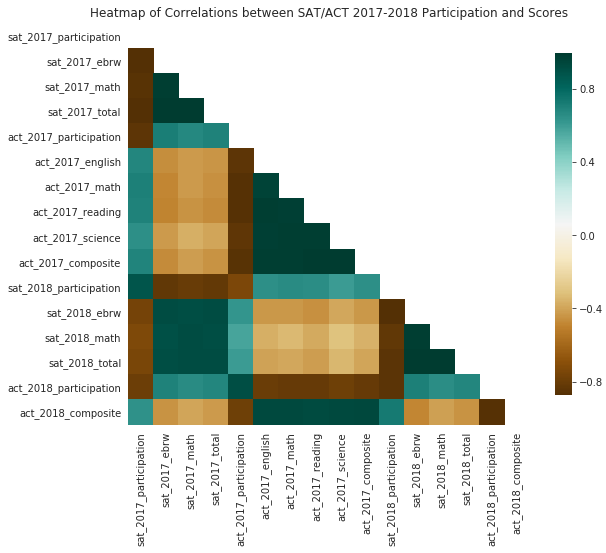

In [44]:
# create heatmap to visualize correlations between all variables

mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(9,9))

with sns.axes_style('white'):
    ax = sns.heatmap(
        final.corr(),
        mask = mask,
        square = True,
        cmap = 'BrBG',
        cbar_kws={"shrink": .7})

ax.set_title('Heatmap of Correlations between SAT/ACT 2017-2018 Participation and Scores')

plt.show()

**Finding:**
- There seems to be a strong negative correlation between participation rates and scores
- Strong positive correlation between scores from 2017 to 2018

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [45]:
# def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2)  
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].hist(dataframe[column]) # feel free to add more settings
#         # Set titles, labels, etc here for each subplot

# function to subplot histograms, using altair instead of seaborn
# takes in data frame, columns to plot (column names, str), var (title for chart, str), and color
def subplot_histograms(df, columns, var, value, color = '#377EA8'):
    df_columns = pd.DataFrame()
    df_columns = final.loc[: , columns]
    data = pd.melt(df_columns, var_name = var, value_name = value)
    return(
        alt.Chart(data).mark_bar(color = color).encode(
            alt.X(value, 
                  bin = True, 
                  title = None
                 ),
            alt.Y ('count()',
                   title = value
                  ),
            column = var 
        ).properties(
            width = 300,
            height = 200
        )
    )

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

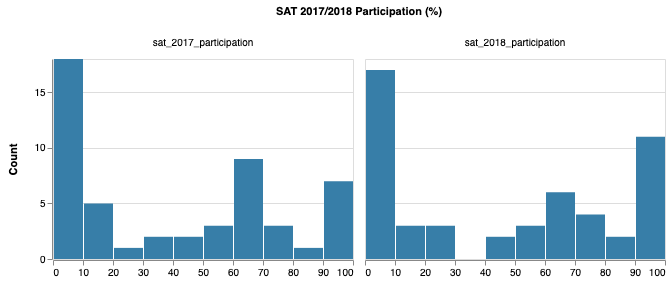

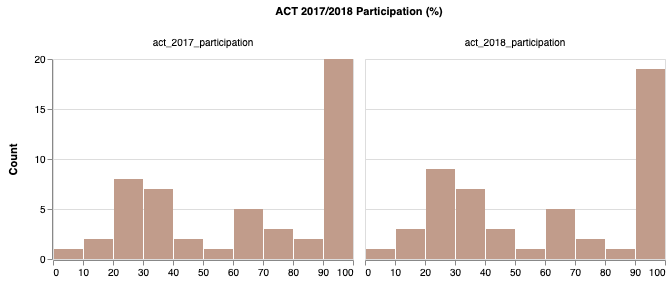

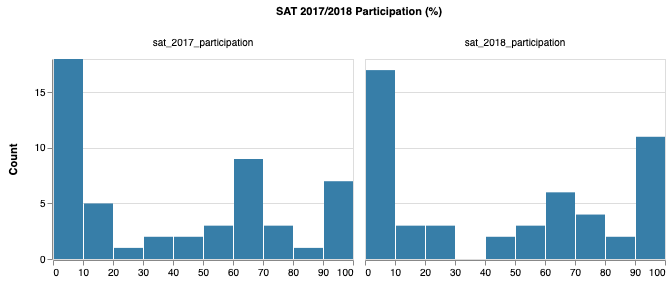

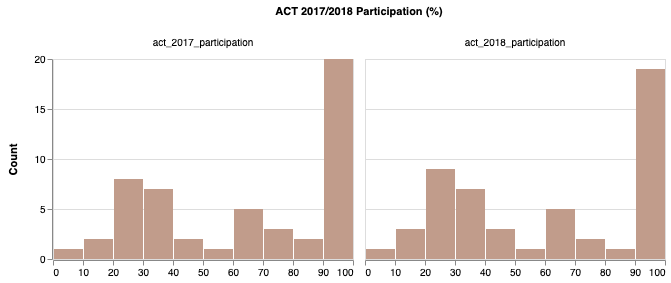

In [46]:
# participation rates for SAT & ACT

columns = ['sat_2017_participation', 'sat_2018_participation']
display(subplot_histograms(final, columns, 'SAT 2017/2018 Participation (%)', 'Count'))

columns = ['act_2017_participation', 'act_2018_participation']
display(subplot_histograms(final, columns, 'ACT 2017/2018 Participation (%)', 'Count', color = '#C19C8B'))

**Finding**
- More states participated closer to 100% for the SAT test comparing from 2017 to 2018, wheras participation rates seem to have dropped for ACT from 2017 to 2018


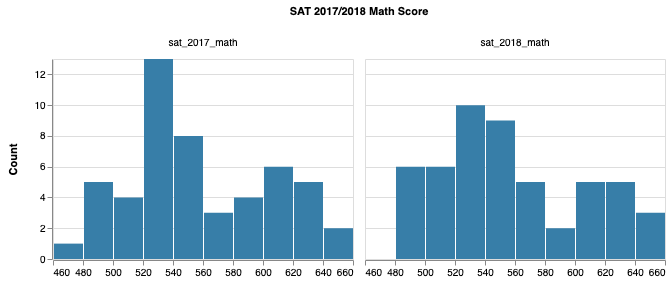

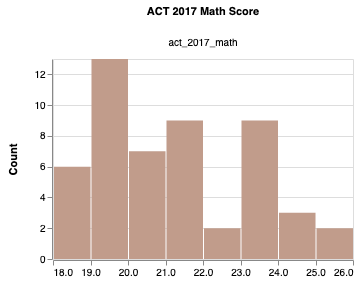

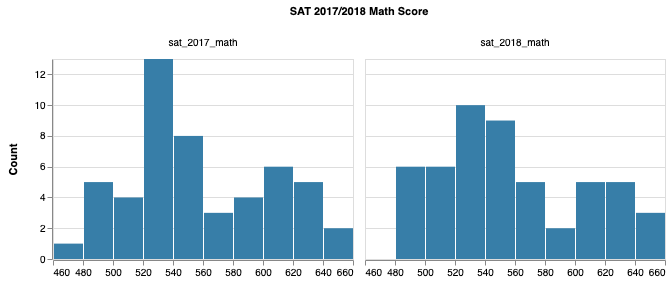

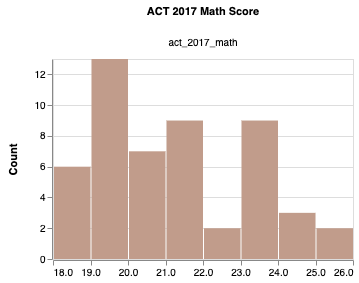

In [47]:
# math scores for SAT and ACT

columns = ['sat_2017_math', 'sat_2018_math']
display(subplot_histograms(final, columns, 'SAT 2017/2018 Math Score', 'Count'))

columns = ['act_2017_math']
display(subplot_histograms(final, columns, 'ACT 2017 Math Score', 'Count', color = '#C19C8B'))

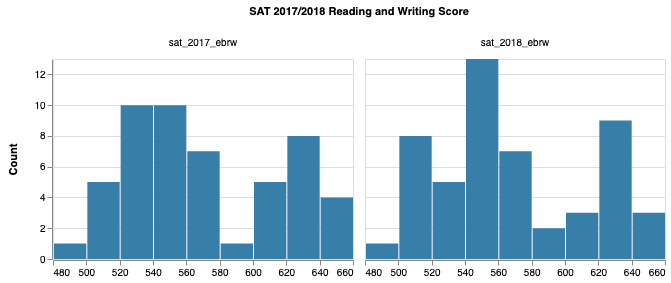

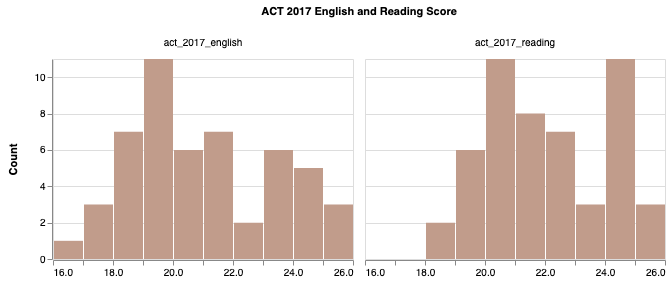

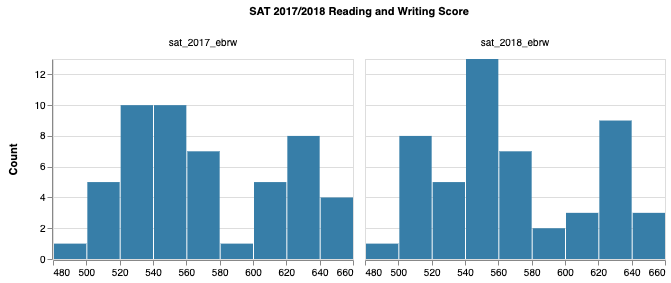

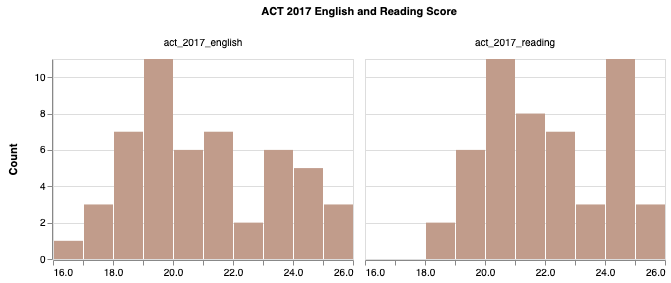

In [48]:
# reading and verbal score for SAT and ACT

columns = ['sat_2017_ebrw', 'sat_2018_ebrw']
display(subplot_histograms(final, columns, 'SAT 2017/2018 Reading and Writing Score', 'Count'))

columns = ['act_2017_english', 'act_2017_reading']
display(subplot_histograms(final, columns, 'ACT 2017 English and Reading Score', 'Count', color = '#C19C8B'))

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [49]:
# using altair instead of matplotlib or seaborn

# function to plot scatterplot between two variables
# takes in data frame, names of both variables (column name, str), x and y axis ranges (list), and title name (str)
# outputs interactive scatterplot, with correlation coefficient and pvalue
def scatterplot (df, first_var, second_var, x_range, y_range, title, color = '#429EA6'):
    corr_coeff, p_value = stats.pearsonr(df[first_var], df[second_var])
    return(
        alt.Chart(df, title = f'{title}, r= {str(round(corr_coeff,2))}, p= {str(round(p_value,3))}'
                 ).mark_circle(color = color).encode(
            alt.X (first_var,
                   scale = alt.Scale(domain = x_range)
                  ),
            alt.Y (second_var,
                   scale = alt.Scale(domain = y_range)
                  ),
            tooltip = ['state', first_var, second_var]
                  ).interactive()
        .properties(
            width = 300,
            height = 200)
    )

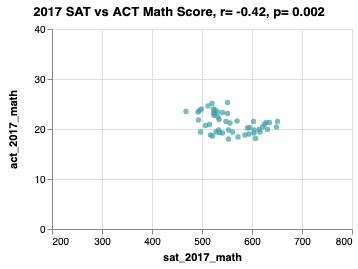

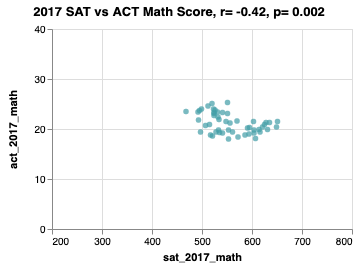

In [50]:
# SAT vs. ACT math scores for 2017
scatterplot(final, 'sat_2017_math', 'act_2017_math', [200, 800], [1, 36], '2017 SAT vs ACT Math Score')

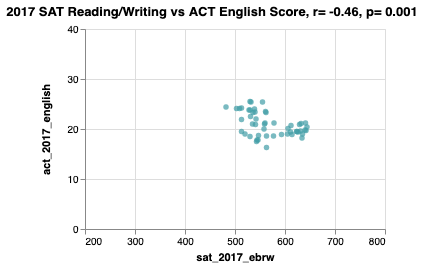

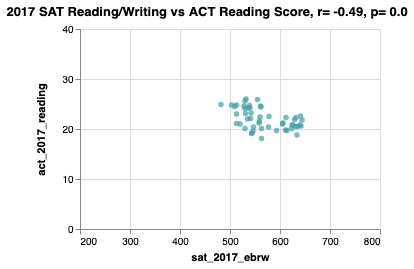

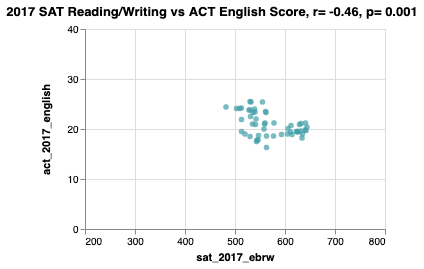

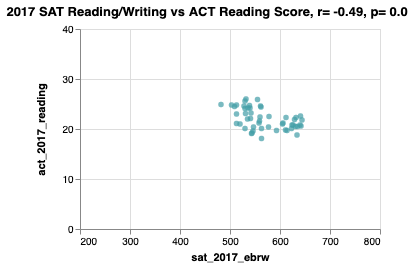

In [51]:
# SAT vs. ACT verbal/reading scores for 2017
display(scatterplot(final, 'sat_2017_ebrw', 'act_2017_english', [200, 800], [1, 36], '2017 SAT Reading/Writing vs ACT English Score'))
display(scatterplot(final, 'sat_2017_ebrw', 'act_2017_reading', [200, 800], [1, 36], '2017 SAT Reading/Writing vs ACT Reading Score'))

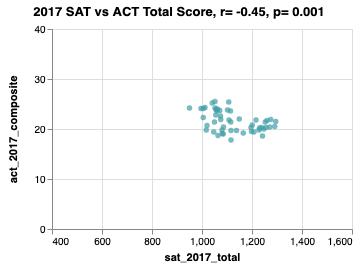

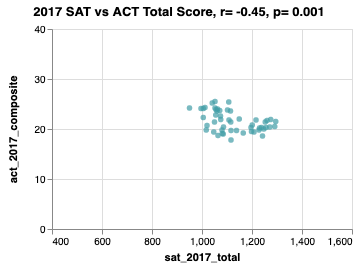

In [52]:
# SAT vs. ACT total/composite scores for 2017
scatterplot(final, 'sat_2017_total', 'act_2017_composite', [400, 1600], [1, 36], '2017 SAT vs ACT Total Score')

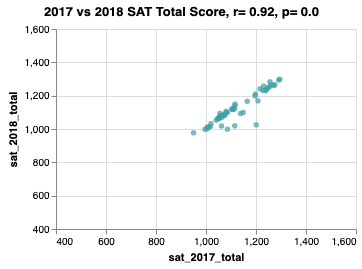

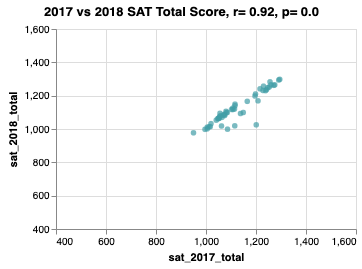

In [53]:
# Total scores for SAT 2017 vs. 2018
scatterplot(final, 'sat_2017_total', 'sat_2018_total', [400, 1600], [400, 1600], '2017 vs 2018 SAT Total Score')

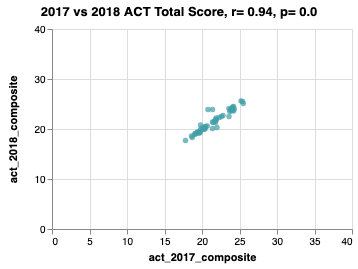

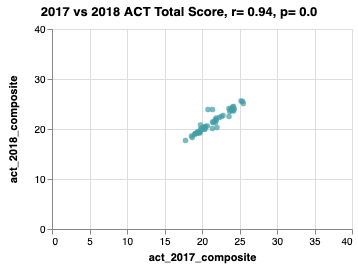

In [54]:
# Composite scores for ACT 2017 vs. 2018
scatterplot(final, 'act_2017_composite', 'act_2018_composite', [1, 36], [1, 36], '2017 vs 2018 ACT Total Score')

**Finding:** These scatterplots further supports the findings from the heatmap visualization seen above.
- Strong positive correlation between scores from 2017 to 2018

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [55]:
# function to output boxplot
def boxplot(data, columns, x, y, title, ytype = 'Q', xtype = 'N'):
    df_columns = pd.DataFrame()
    df_columns = final.loc[: , columns]
    data = pd.melt(df_columns, var_name = x, value_name = y)
    
    # make all the aggregation strings up front
    min_agg = f'min({y}):{ytype}'
    max_agg = f'max({y}):{ytype}'
    median_agg = f'median({y}):{ytype}'
    q1_agg = f'q1({y}):{ytype}'
    q3_agg = f'q3({y}):{ytype}'
    x_val = f'{x}:{xtype}'

    # create a single base chart
    # which the other layers will
    # be augmented from
    base = alt.Chart(title = title).encode(
        x = x_val
    ).properties(
        width = 400
    )

    # now we only need to specify what is unique
    # to each layer!
    whisker_low = base.mark_rule().encode(
        y = alt.Y(min_agg, axis = alt.Axis(title = y)),
        y2 = q1_agg
    )

    box = base.mark_bar().encode(
        y = q1_agg,
        y2 = q3_agg
    )

    midline = base.mark_tick(
        color = 'white',
    ).encode(
        y = median_agg,
        y2 = median_agg
    )

    whisker_high = base.mark_rule().encode(
        y = max_agg,
        y2 = q3_agg
    )

    # combine with layer()
    return alt.layer(whisker_low, box, whisker_high, midline, data = data)

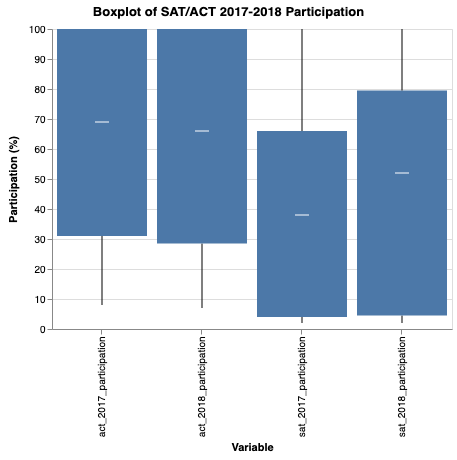

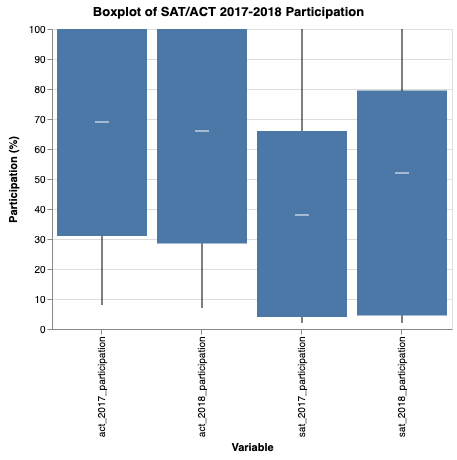

In [56]:
# boxplot for participation rates
columns = ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']
boxplot(final, columns, x = 'Variable', y = 'Participation (%)', title = 'Boxplot of SAT/ACT 2017-2018 Participation')

**Finding**
- Average participation % for ACT test is higher than SAT test

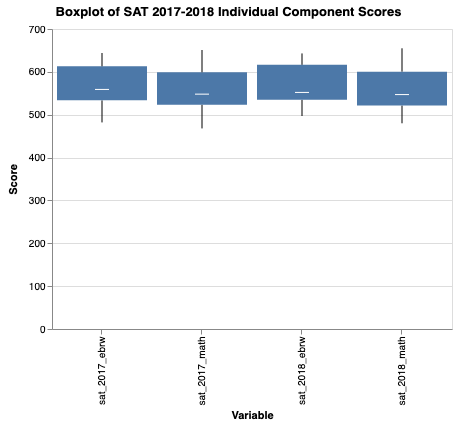

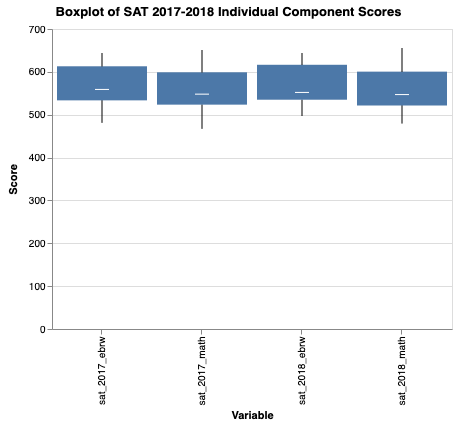

In [57]:
# SAT individual section scores
columns = ['sat_2017_ebrw', 'sat_2017_math', 'sat_2018_ebrw', 'sat_2018_math']
boxplot(final, columns, x = 'Variable', y = 'Score', title = 'Boxplot of SAT 2017-2018 Individual Component Scores')

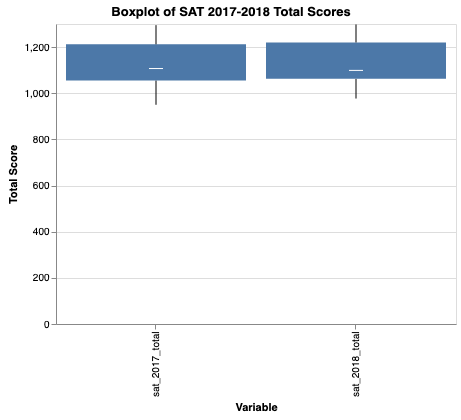

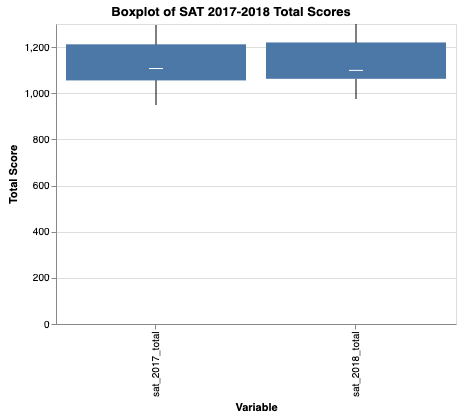

In [58]:
# SAT total scores
columns = ['sat_2017_total', 'sat_2018_total']
boxplot(final, columns, x = 'Variable', y = 'Total Score', title = 'Boxplot of SAT 2017-2018 Total Scores')

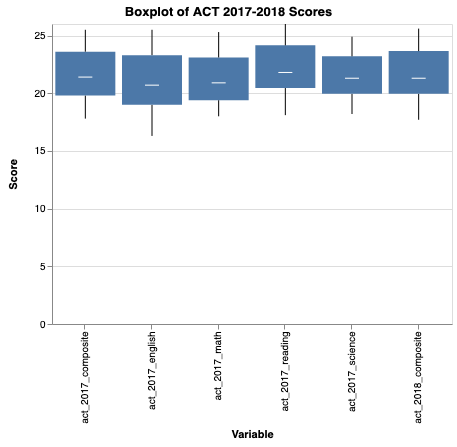

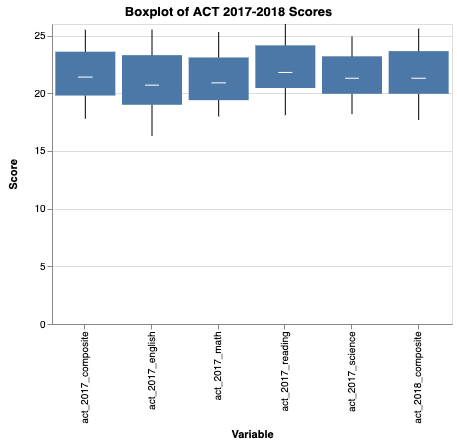

In [59]:
# ACT total and individual component scores
columns = ['act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science', 'act_2017_composite', 'act_2018_composite']
boxplot(final, columns, x = 'Variable', y = 'Score', title = 'Boxplot of ACT 2017-2018 Scores')

**Finding**
- Average ACT 2017 reading and science scores seem to average better than english and math scores.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

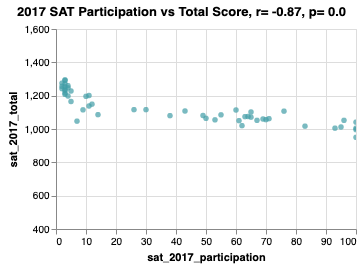

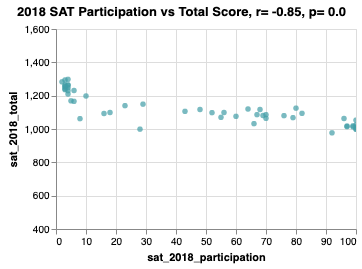

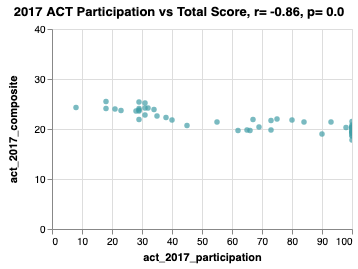

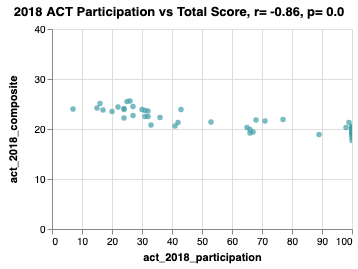

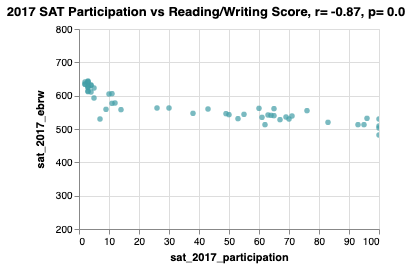

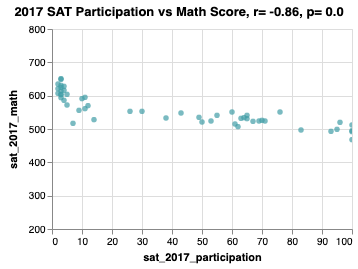

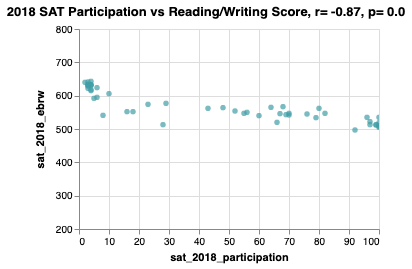

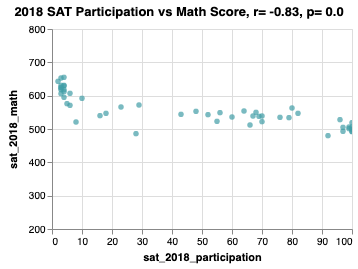

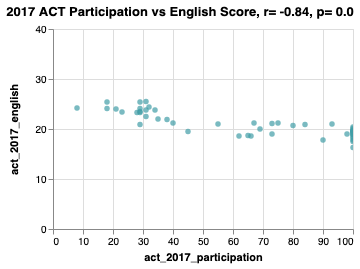

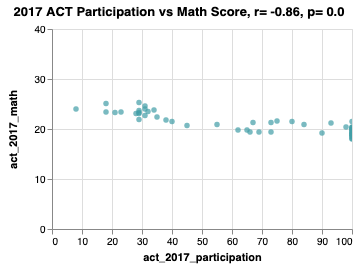

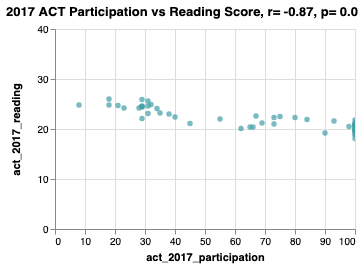

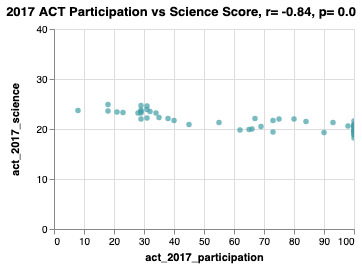

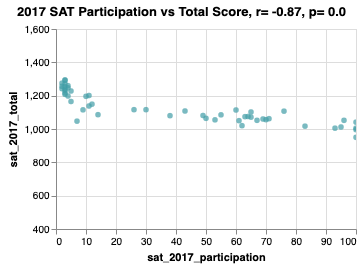

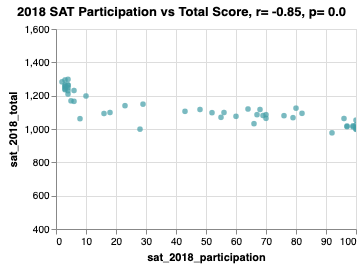

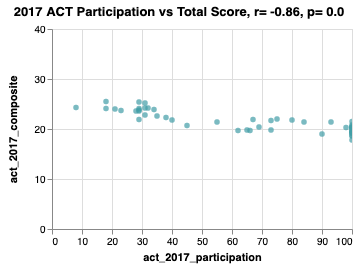

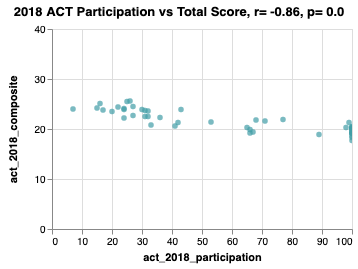

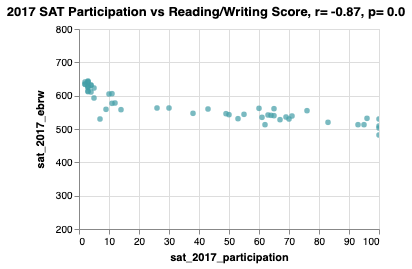

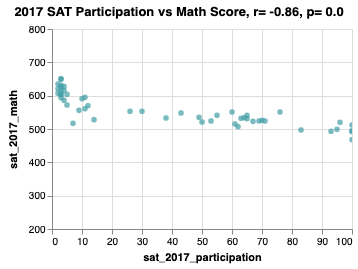

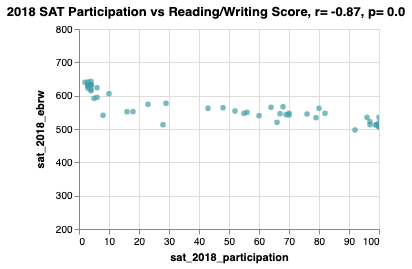

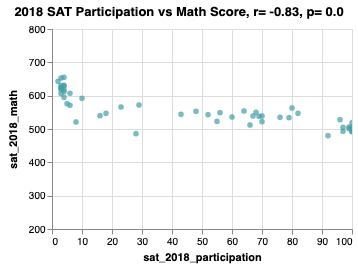

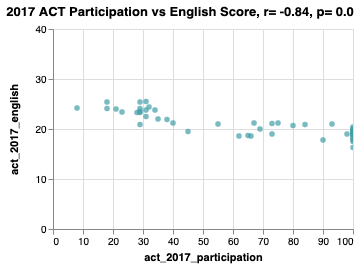

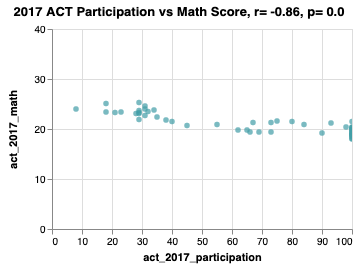

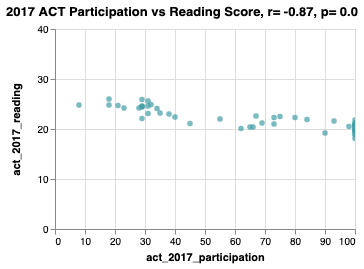

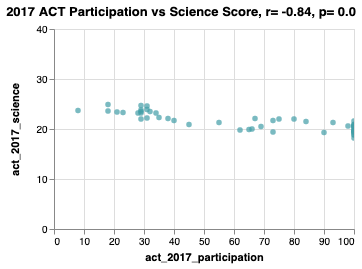

In [60]:
# interested in participation vs scores

display(scatterplot(final, 'sat_2017_participation', 'sat_2017_total', [0, 100], [400, 1600], '2017 SAT Participation vs Total Score'))
display(scatterplot(final, 'sat_2018_participation', 'sat_2018_total', [0, 100], [400, 1600], '2018 SAT Participation vs Total Score'))
display(scatterplot(final, 'act_2017_participation', 'act_2017_composite', [0, 100], [1, 36], '2017 ACT Participation vs Total Score'))
display(scatterplot(final, 'act_2018_participation', 'act_2018_composite', [0, 100], [1, 36], '2018 ACT Participation vs Total Score'))
display(scatterplot(final, 'sat_2017_participation', 'sat_2017_ebrw', [0, 100], [200, 800], '2017 SAT Participation vs Reading/Writing Score'))
display(scatterplot(final, 'sat_2017_participation', 'sat_2017_math', [0, 100], [200, 800], '2017 SAT Participation vs Math Score'))
display(scatterplot(final, 'sat_2018_participation', 'sat_2018_ebrw', [0, 100], [200, 800], '2018 SAT Participation vs Reading/Writing Score'))
display(scatterplot(final, 'sat_2018_participation', 'sat_2018_math', [0, 100], [200, 800], '2018 SAT Participation vs Math Score'))
display(scatterplot(final, 'act_2017_participation', 'act_2017_english', [0, 100], [1, 36], '2017 ACT Participation vs English Score'))
display(scatterplot(final, 'act_2017_participation', 'act_2017_math', [0, 100], [1, 36], '2017 ACT Participation vs Math Score'))
display(scatterplot(final, 'act_2017_participation', 'act_2017_reading', [0, 100], [1, 36], '2017 ACT Participation vs Reading Score'))
display(scatterplot(final, 'act_2017_participation', 'act_2017_science', [0, 100], [1, 36], '2017 ACT Participation vs Science Score'))

**Finding:** These scatterplots further supports the findings from the heatmap visualization seen above.
- Strong negative correlation between participation rates and scores (higher the participation, lower the scores, and vice versa). This makes sense as for some states, the participation % may be lower as the tests are not mandatory. Thus, only the students who are interested in taking the test to apply to colleges would participate. These students would also likely be more inclined to do well!

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [61]:
# function to return a choropleth map
# takes in list of column names to create subplots for and a merged df (with columns ids for states, variable, and its value)
def map (variable_list, states, final_map):
    return(
        alt.Chart(states).mark_geoshape().encode(
        alt.Color(alt.repeat('row'), type = 'quantitative')
    ).transform_lookup(
        lookup = 'id',
        from_ = alt.LookupData(final_map, 'id', variable_list)
    ).properties(
        width = 300,
        height = 220
    ).project(
        type = 'albersUsa'
    ).repeat(
        row = variable_list
    ).resolve_scale(
        color = 'independent'
    )
    )

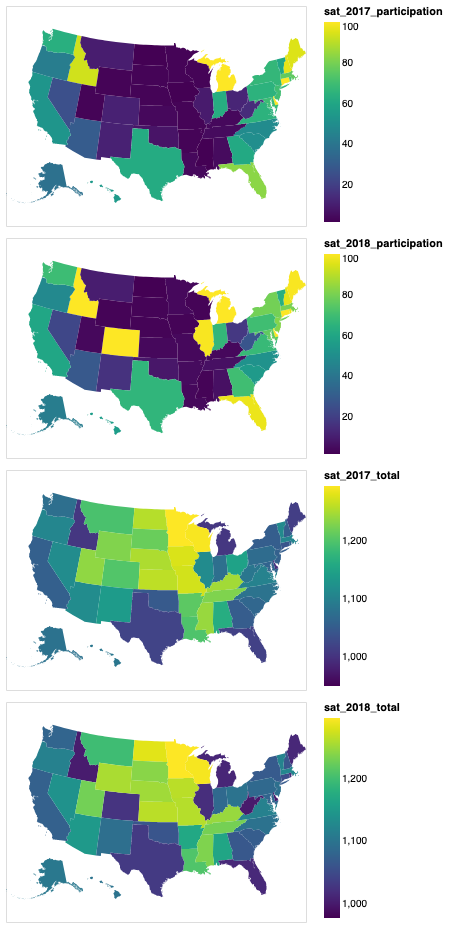

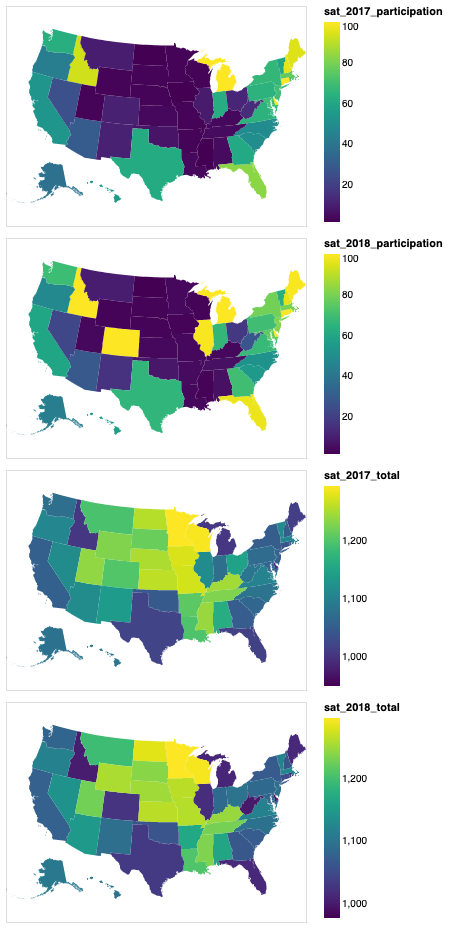

In [62]:
ids = data.population_engineers_hurricanes().loc[:,['state', 'id']] # taking the state ids from existing data

final_map = final.merge(ids, on = 'state')

states = alt.topo_feature(data.us_10m.url, 'states')

variable_list = ['sat_2017_participation', 'sat_2018_participation', 'sat_2017_total', 'sat_2018_total']
map(variable_list, states, final_map)

**Finding**
- SAT test participation is lower in the midwest region of the states (opposite to SAT total scores)

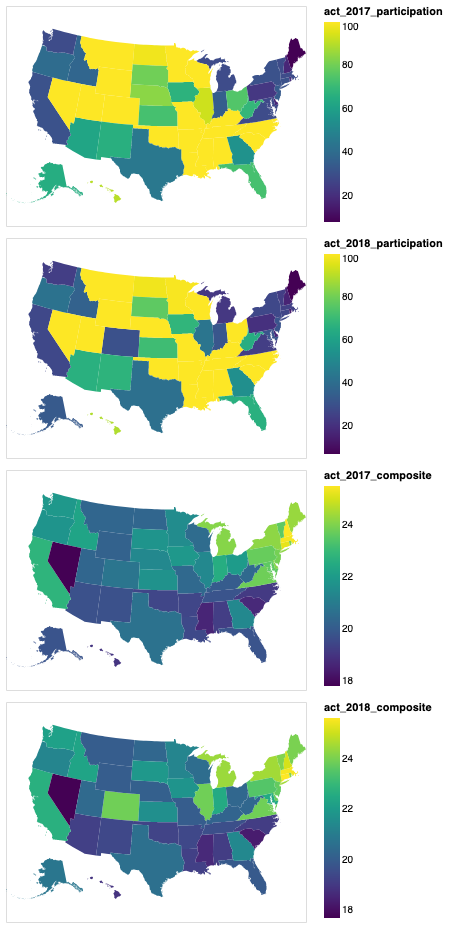

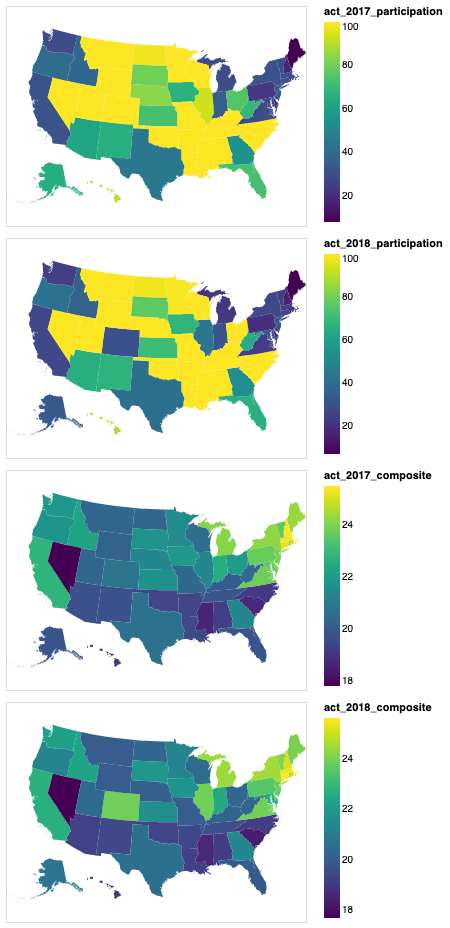

In [63]:
variable_list = ['act_2017_participation', 'act_2018_participation', 'act_2017_composite', 'act_2018_composite']
map(variable_list, states, final_map)

**Finding**
- ACT test participation is lower in the west and northeast region of the states

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

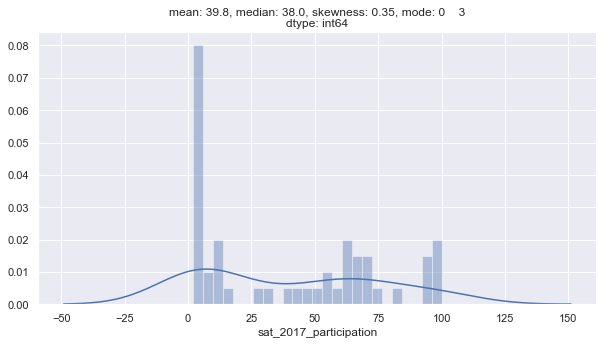

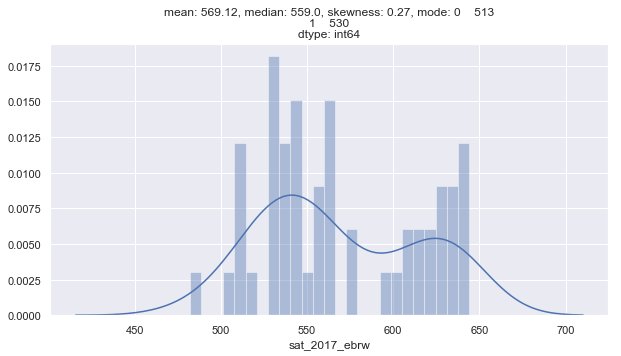

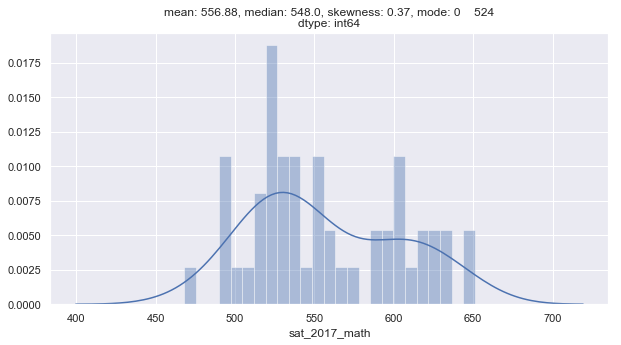

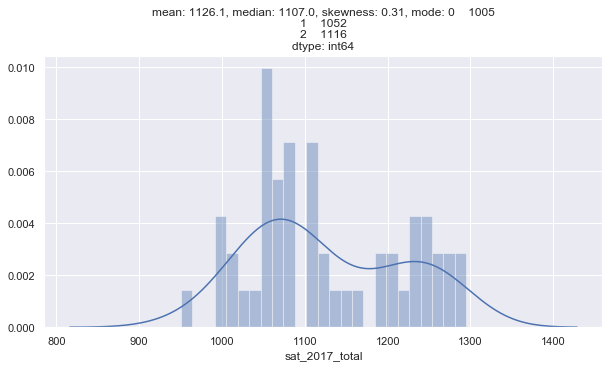

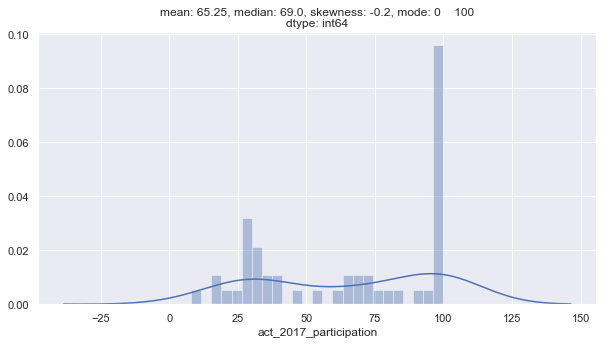

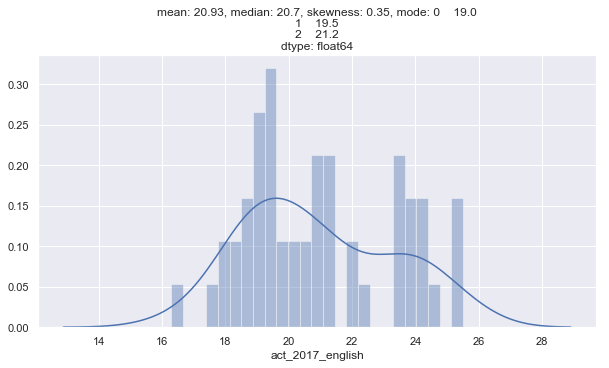

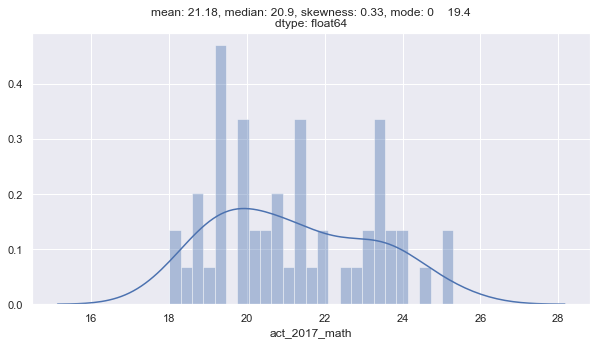

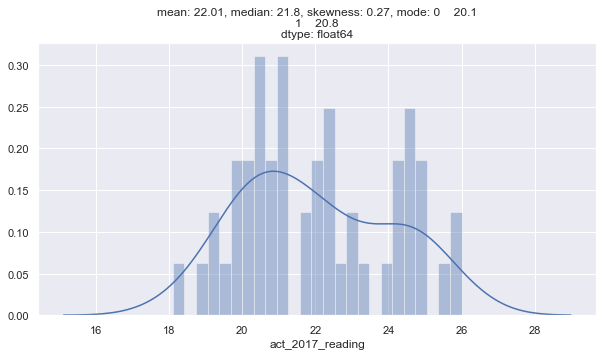

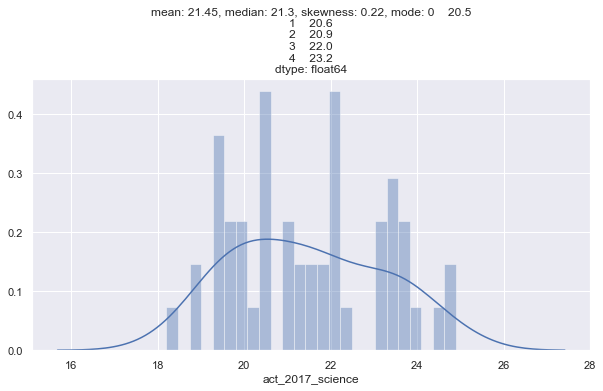

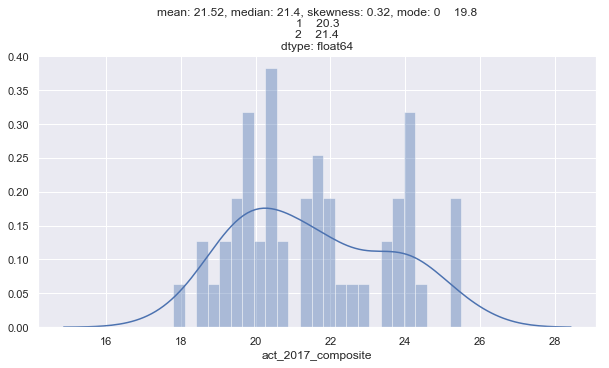

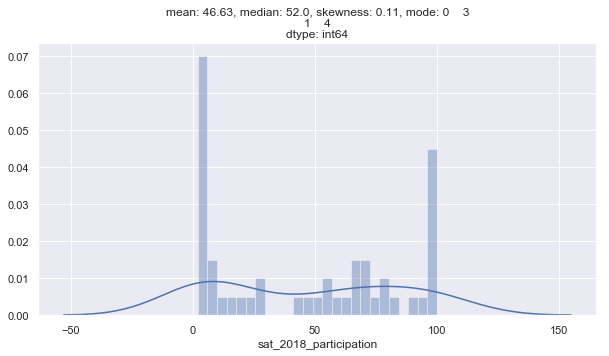

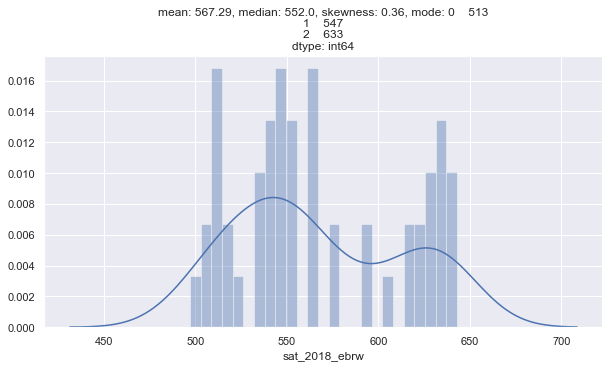

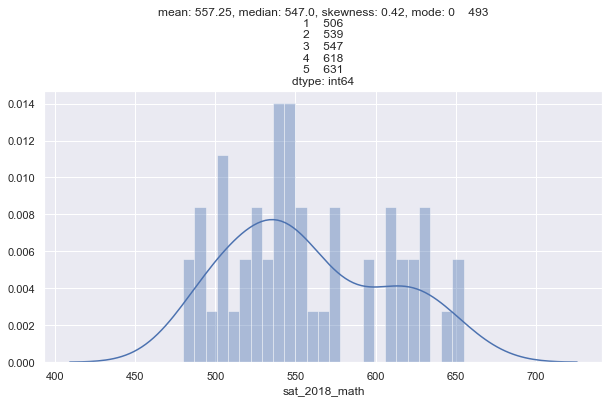

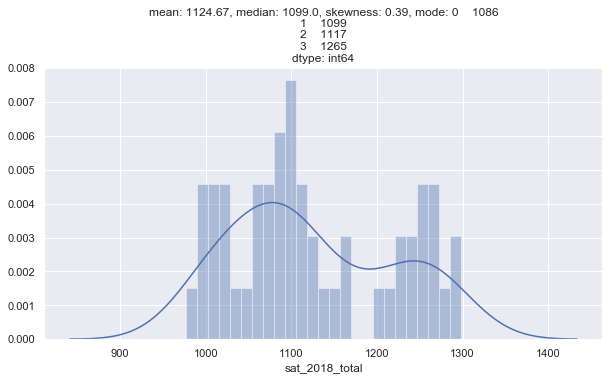

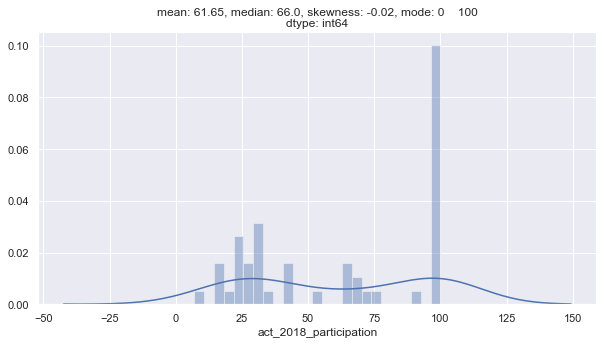

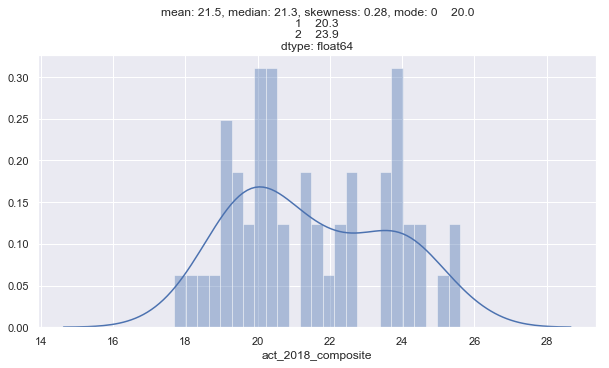

In [64]:
# plotting distributions and estimated PDF to visualize

sns.set(rc={'figure.figsize':(10,5)})
for col in final_only_num:
    sns.distplot(
        final_only_num[col],
        bins = 25
    ).set_title(
        f'mean: {round(final_only_num[col].mean(),2)}, median: {final_only_num[col].median()}, skewness: {round(final_only_num[col].skew(),2)}, mode: {final_only_num[col].mode().iloc[:]}'
    )
    plt.show()

**Answers:**
As the histogram and KDE plots shown above,
- The participation rates (for both ACT and SAT 2017-2018) has a spread of values from 0-100, with a distribution that looks somewhat uniform (flat) except for peaks (i.e. mode) close to 0% (for SAT) and 100% (for ACT). 
- All other features looks like they are approaching a normal distribution however not perfect. They resemble of a bimodal distribution. They have 2 peaks and an assymetrical distribution skewed to the right (positive skewness) where the mean is greater than median, and median is greater than the mode.
- However, as the skewness factor is between -0.5 to 0.5, all distributions can be considered approximately symmetric!

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

**Answer:**
We assume this trend as the distributions can be considered approximately symmetric (based on skewness factors calculated) with the limited sample size we sampled from (n = 51 states). 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**
This assumption holds for SAT 2018 Math scores (alpha = 0.05). For the other variables, this may affect estimates made from these data as for samples that may not be normally distributed (or if it does truly come from a normal distribution and not enough samples have been collected yet), the estimates made from these data would be less accurate due to inaccuracies in estimates of the real population distribution.

In [65]:
# code section below checked if math, reading, and rates are normally distributed
# null hypothesis: sample comes from a normal distribution

def normal_test (col):
    k2, p = stats.normaltest(col)
    alpha = 0.05
    print(f'p = {p}')
    if p < alpha:  
        print('sample does not look normally distributed')
    else:
        print('sample looks like it comes from a normal distribution')

In [66]:
normal_test(final.sat_2017_math)

p = 0.056072998982864684
sample looks like it comes from a normal distribution


In [67]:
normal_test(final.sat_2018_math)

p = 0.04971003350015675
sample does not look normally distributed


In [68]:
normal_test(final.sat_2017_ebrw)

p = 0.0009986795076584
sample does not look normally distributed


In [69]:
normal_test(final.sat_2018_ebrw)

p = 0.0004541104967217649
sample does not look normally distributed


In [70]:
normal_test(final.act_2017_math)

p = 0.03786805958606832
sample does not look normally distributed


In [71]:
normal_test(final.act_2017_reading)

p = 0.04396683079879635
sample does not look normally distributed


In [72]:
normal_test(final.sat_2017_participation)

p = 4.028943345766873e-06
sample does not look normally distributed


In [73]:
normal_test(final.sat_2018_participation)

p = 9.372009081197283e-16
sample does not look normally distributed


In [74]:
normal_test(final.act_2017_participation)

p = 1.8018419611696254e-16
sample does not look normally distributed


In [75]:
normal_test(final.act_2018_participation)

p = 1.1798576998141957e-31
sample does not look normally distributed


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:** Yes, we can compare SAT and ACT participation rates in 2017 (they have same population and same possible value ranges, 0-100%).

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer:** No, it is not appropriate to compare these specific SAT and ACT math scores because they have different possible value ranges, SAT ones ranging from 200-800 and ACT from 1-36. The means scores/means would for sure be different. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [76]:
# conduct t-test

# null hypothesis => mean of sat participation is equal to the mean of act participation
t_stat, p_value = stats.ttest_ind(final.sat_2017_participation, final.act_2017_participation)
print(p_value)

t_stat, p_value = stats.ttest_ind(final.sat_2018_participation, final.act_2018_participation)
print(p_value)

0.00024134203698662353
0.038163511664521345


**Finding**:
- We can conclude that there is a difference between the average SAT participation rate and average ACT participation rate

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**North Dakota** has the lowest SAT participation rates at 2% for 2017/2018.
From this [source](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html), students must take ACT or WorkKeys in high school, however score doesn't affect grades or graduation. SAT doesn't seem to be required. 

**Maine** has lowest ACT participation rates at 7-8% for 2017/2018. 
SAT is the only test required for high school students.

**Colorado** SAT participation rate increased 89% from 2017 to 2018 (decreased by 70% for ACT participation). 
SAT is now required for high school. From this [source](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/), "Colorado juniors face new, revamped college exam in SAT after state dumps rival ACT... They found that the College Board’s Practice SAT, given to 10th-graders, aligned better with the high school Colorado Academic Standards, a requirement of 2015 legislation, said Will Morton, director of assessment administration for the CDE."

**Illinois** SAT participation rate increased 90% from 2017 to 2018 (decreased by 50% on ACT participation).
SAT is now required for high school. From this [source](https://www.testive.com/illinois/), Illinois also changed to the SAT in 2017.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Based on this data exploration, here are the key takeaways:**
1. Average participation % for ACT test is higher than that for the SAT test
> - Connecticut, Delaware, District of Columbia, Michigan, Colorado, and Idaho have the highest SAT participation rates (with 100%).
> - Iowa, Mississippi, and North Dakota have the lowest SAT participation rates (with 2%).
> - Many states have the highest ACT participation rates (with 100%). 
> - Maine has the lowest ACT participation rates (7-8%).
2. There seems to be a strong negative correlation between participation rates and scores
> - Minnesota has the highest SAT total score.
> - District of Columbia has the lowest SAT total score.
> - New Hampshire and Connecticut has the highest ACT composite score.
> - Nevada has the lowest has the lowest ACT composite score.
3. Average ACT 2017 reading and science scores seem to average better than english and math scores.

For Iowa, Mississippi, and North Dakota (with lower SAT participation rate), for the College Board to increase participation amongst graduating seniors in these states, I would suggest to conduct surveys to understand why students have not participated in the SAT tests in the past. One effective method to increase participation may be to mandate the completion of the SAT test by all high school students in these states. Lastly, I would suggest to provide students with more test preparation support. As there is a negative correlation between scores and participation rates, students may feel more inclined to take the tests if they are provided with adequate support (potentially in the math section as it was found to have an average score lower than the other sections).

Additional data that would help better inform these investigations include: 
1. College preferences between the SAT and ACT test (might help explain and be correlated with high and low participation rates). 
2. Difference between the SAT and ACT tests (variables that might impact participation rates, i.e. cost). This could also lead to providing incentives such as lower costs or free tests to increase participation.